In [1]:
### Data Cleaning

In [2]:
# importing libraries
import pandas as pd
import numpy as np

Reading dataset

In [3]:
data_uni = pd.read_excel("Data Uni Dissertation.xlsx")

data_uni

,Course,UCAS,25 Above,Disability,Ethnicity,Gender,British,English native Language,Parent He attendance,Polar_4_Score,...,Overall AWM,Progression,First Sit,Second Sit,Fails,No Submissions,Late Submission,Pass,Re Takes,desertion
0,BA Business Manangement Enterpreneurship and I...,no,no,no,Asian,Male,no,no,yes,4.0,...,62.000000,yes,3,3.0,0,2,2,100.000000,yes,no
1,BA Business Management,no,no,no,White,Male,no,no,yes,2.0,...,36.000000,no,1,2.0,5,3,0,83.333333,no,yes
2,BA Business Management Enterpreneurship and In...,no,no,no,Asian,Male,yes,yes,yes,4.0,...,41.000000,yes,6,0.0,0,0,0,100.000000,no,yes
3,BA Business Management,no,yes,no,White,Female,no,no,no,3.0,...,42.000000,yes,6,0.0,0,0,0,100.000000,no,yes
4,BA Business Management Enterpreneurship and In...,no,no,no,White,Male,yes,yes,yes,4.0,...,54.333333,yes,4,2.0,0,2,0,100.000000,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,BA,yes,no,no,Other ethnic background,Female,no,yes,no,1.0,...,45.000000,yes,6,0.0,0,0,1,100.000000,no,yes
1029,BA,yes,no,no,NaN,Male,yes,yes,yes,4.0,...,77.000000,yes,6,0.0,0,0,0,100.000000,no,no
1030,BA,no,yes,no,Asian,Female,no,no,no,1.0,...,33.000000,no,1,1.0,2,4,1,33.333333,yes,yes
1031,BA,no,yes,no,Other ethnic background,Male,no,no,yes,4.0,...,76.000000,yes,6,0.0,0,0,0,100.000000,no,no


Exploring Data

In [4]:
#generating profiling report

from pandas_profiling import ProfileReport
##report = ProfileReport(data_uni)
#report.to_file(output_file= "report.html")

Cleaning Data

In [5]:
# Dealing with  inconsistent values

def trimmer(df):
    column_list = []

    for (columnName, columnData) in df.iteritems():
       
        if columnData.dtype == "object":

            df_replace = columnData.str.strip()

            column_list.append(df_replace)
        else:
            column_list.append(columnData)
            

    return (pd.DataFrame(column_list))

trimmer(data_uni)


,0,1,2,3,4,5,6,7,8,9,...,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032
Course,BA Business Manangement Enterpreneurship and I...,BA Business Management,BA Business Management Enterpreneurship and In...,BA Business Management,BA Business Management Enterpreneurship and In...,BA Business Management Enterpreneurship and In...,BA Business Management Marketing,BA Business Management Enterpreneurship and In...,BA Business Management Enterpreneurship and In...,BA Business Management,...,BA,BA,BA,BA,BA,BA,BA,BA,BA,BA
UCAS,no,no,no,no,no,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,no,no,no
25 Above,no,no,no,yes,no,no,no,no,no,no,...,no,yes,no,yes,yes,no,no,yes,yes,yes
Disability,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
Ethnicity,Asian,White,Asian,White,White,Asian,White,White,White,White,...,Asian,White,NaN,NaN,NaN,Other ethnic background,NaN,Asian,Other ethnic background,Other ethnic background
Gender,Male,Male,Male,Female,Male,Male,Male,Male,Male,Female,...,Male,Male,Male,Female,Male,Female,Male,Female,Male,Female
British,no,no,yes,no,yes,yes,no,yes,yes,yes,...,no,yes,yes,no,yes,no,yes,no,no,no
English native Language,no,no,yes,no,yes,yes,yes,yes,yes,yes,...,no,NaN,NaN,no,no,yes,yes,no,no,no
Parent He attendance,yes,yes,yes,no,yes,yes,no,no,no,no,...,yes,no,yes,yes,yes,no,yes,no,yes,no
Polar_4_Score,4.0,2.0,4.0,3.0,4.0,3.0,5.0,4.0,2.0,NaN,...,5.0,3.0,4.0,3.0,2.0,1.0,4.0,1.0,4.0,NaN


In [6]:
# creating a new df after trimming 
data_uni_df = trimmer(data_uni)
data_uni_df = data_uni_df.transpose( copy = True)

#saving the new data frame
data_uni_df.to_csv("data_uni.csv", index = False)
data_uni_2 = pd.read_csv("data_uni.csv")

imputting missing values

In [7]:
#filling nan with zeros
data_uni_2.iloc[:, [24,25,29]]= data_uni_df.iloc[:, [24,25,29]].fillna(0)

data_uni_2.isna().sum()

Course                          2
UCAS                            0
25 Above                        0
Disability                      0
Ethnicity                      13
Gender                          0
British                        71
English native Language        69
Parent He attendance           37
Polar_4_Score                 118
SLC                             0
Care Leaver                   158
Student Visa                   69
Refugee                         7
London Permanent Residence      5
UCAS Points                    54
English                       160
Maths                         161
A Levels                       60
Btec                          109
Previous work                   3
Bursary                       162
Attendance                      0
AWM year 1                      0
AWM year 2                      0
AWM year 3                      0
Overall AWM                     0
Progression                     0
First Sit                       0
Second Sit    

In [8]:
#imputing missing values with most frequent values
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data_uni_2.iloc[:, [0,4,6,7,8,9,11,12,13,14,18,19,20,21]])
data_uni_2.iloc[:, [0,4,6,7,8,9,11,12,13,14,18,19,20,21]]= imputer.transform(data_uni_2.iloc[:, [0,4,6,7,8,9,11,12,13,14,18,19,20,21]])


In [9]:
#imputing missing values with median values
data_num = data_uni_2.select_dtypes(include="number")

imputer_2 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_2.fit(data_num.iloc[:, [1,2,3]])
data_num.iloc[:, [1,2,3]] = imputer_2.transform(data_num.iloc[:, [1,2,3]])

data_uni_2.iloc[:, [15,16,17]] = data_num.iloc[:, [1,2,3]]

In [10]:
#Generating report with clean data
#report2 = ProfileReport(data_uni_2)
#report2.to_file(output_file= "report2.html")

Dropping Highly Correlated and unseful Features

In [11]:
data_uni_2= data_uni_2.drop(["Course","AWM year 1", "AWM year 2", "AWM year 3","Overall AWM", "Progression", "Attendance"], axis = 1)

Encoding Feautures

In [12]:
#ethinicty binarisation 

data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("White", "0")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Asian", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Black/Black British African", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Other ethnic background", "1")

print(data_uni_2.Ethnicity)

0       1
1       0
2       1
3       0
4       0
       ..
1028    1
1029    0
1030    1
1031    1
1032    1
Name: Ethnicity, Length: 1033, dtype: object


In [13]:
# Polar 4 Score Binarisation
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(5, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(4, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(3, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(2, 1)

print(data_uni_2.Polar_4_Score)


0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1028    1.0
1029    0.0
1030    1.0
1031    0.0
1032    0.0
Name: Polar_4_Score, Length: 1033, dtype: float64


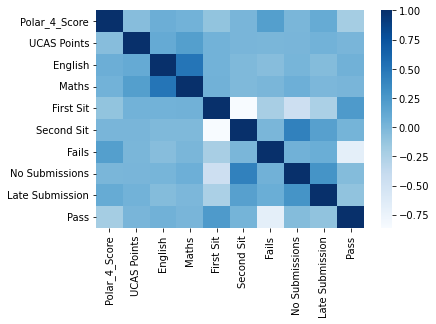

In [14]:
#Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data_uni_2.corr()
plt.figure()
sns.heatmap(correlation_matrix, cmap= "Blues")
correlation_matrix.style.background_gradient(sns.light_palette('blue', as_cmap=True))
plt.show()

In [15]:
#splitting X and y
y = data_uni_2["desertion"]
X = data_uni_2.drop(["desertion"], axis = 1)

In [16]:
#Encoding dependent Variable
from sklearn.preprocessing import LabelEncoder
from collections import Counter

le = LabelEncoder()
y_enc = le.fit_transform(y)
Counter(y)

Counter({'no': 875, 'yes': 158})

Test 1

In [22]:
#Encoding independant variables

from sklearn.preprocessing import OneHotEncoder


X_cat = X.select_dtypes(exclude="number")

enc = OneHotEncoder(handle_unknown= "error", sparse = False, drop = "if_binary")

X_cat= np.array(enc.fit_transform(X_cat))

X_cat = pd.DataFrame(X_cat )


X_cat.columns = enc.get_feature_names()
print(X_cat)

      x0_yes  x1_yes  x2_yes  x3_1  x4_Male  x5_yes  x6_yes  x7_NO  x7_no  \
0        0.0     0.0     0.0   1.0      1.0     0.0     0.0    0.0    0.0   
1        0.0     0.0     0.0   0.0      1.0     0.0     0.0    0.0    0.0   
2        0.0     0.0     0.0   1.0      1.0     1.0     1.0    0.0    0.0   
3        0.0     1.0     0.0   0.0      0.0     0.0     0.0    0.0    1.0   
4        0.0     0.0     0.0   0.0      1.0     1.0     1.0    0.0    0.0   
...      ...     ...     ...   ...      ...     ...     ...    ...    ...   
1028     1.0     0.0     0.0   1.0      0.0     0.0     1.0    0.0    1.0   
1029     1.0     0.0     0.0   0.0      1.0     1.0     1.0    0.0    0.0   
1030     0.0     1.0     0.0   1.0      0.0     0.0     0.0    0.0    1.0   
1031     0.0     1.0     0.0   1.0      1.0     0.0     0.0    0.0    0.0   
1032     0.0     1.0     0.0   1.0      0.0     0.0     0.0    0.0    1.0   

      x7_yes  x8_yes  x9_yes  x10_yes  x11_yes  x12_yes  x13_yes  x14_yes  

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_num = X.select_dtypes(include="number")
X_num_colnames= X_num.columns 
a = sc.fit_transform(X_num.to_numpy())
X_num = pd.DataFrame(a)
X_num.columns = X_num_colnames

X_num_cat = pd.concat((X_num, X_cat), axis =1)

print(X_num_cat)

      Polar_4_Score  UCAS Points   English     Maths  First Sit  Second Sit  \
0         -0.556105    -0.550745  0.050193 -0.732941  -0.781923    0.940436   
1          1.798223    -0.398411  0.050193  0.172715  -2.316066    0.144149   
2         -0.556105     1.023382 -0.735405 -0.732941   1.519291   -1.448426   
3         -0.556105     0.058594  3.192587  2.889681   1.519291   -1.448426   
4         -0.556105     1.074160  0.835791  0.172715  -0.014851    0.144149   
...             ...          ...       ...       ...        ...         ...   
1028       1.798223    -0.347632 -0.735405 -0.732941   1.519291   -1.448426   
1029      -0.556105     0.007816 -0.735405 -0.732941   1.519291   -1.448426   
1030       1.798223    -0.246076  0.835791  0.172715  -2.316066   -0.652139   
1031      -0.556105    -0.398411  0.835791  1.078370   1.519291   -1.448426   
1032      -0.556105    -0.246076  2.406988 -0.732941   1.519291   -1.448426   

         Fails  No Submissions  Late Submission    

Test 2

Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1033, 29)
    Loaded train data. Shape = (1033, 29)
    Some column names had special characters whic

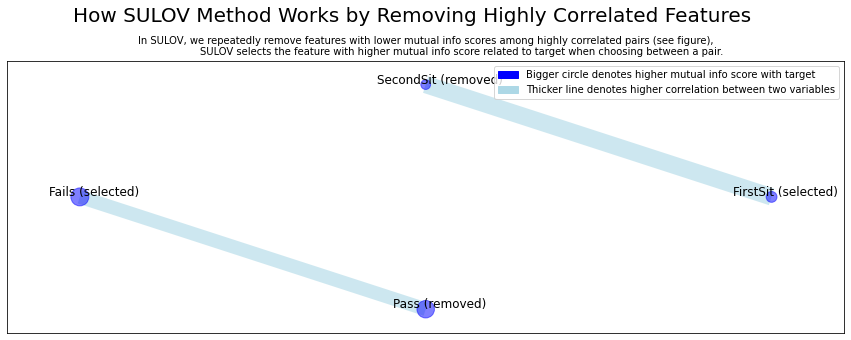

Time taken for SULOV method = 0 seconds
    Adding 18 categorical variables to reduced numeric variables  of 8
Final list of selected vars after SULOV = 26
Readying dataset for Recursive XGBoost by converting all features to numeric...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after pruning = (1033, 29)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 26 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 26 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 21 variables...
            Time taken for

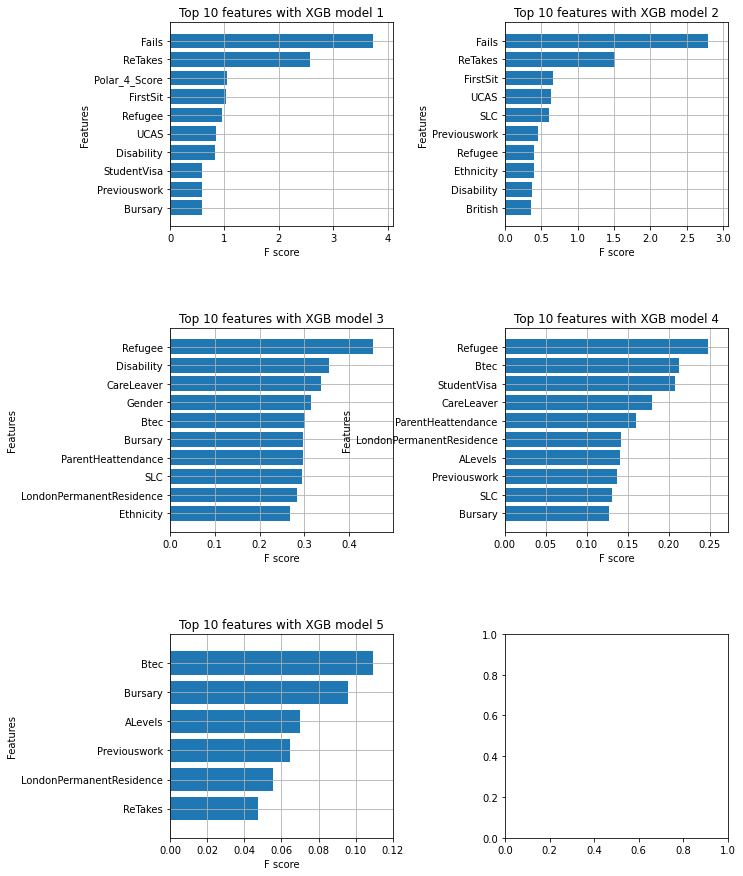

            Total time taken for XGBoost feature selection = 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 19 important features:
['Fails', 'ReTakes', 'Polar_4_Score', 'FirstSit', 'Refugee', 'UCAS', 'Disability', 'StudentVisa', 'Previouswork', 'Bursary', 'SLC', 'Ethnicity', 'British', 'CareLeaver', 'Gender', 'Btec', 'ParentHeattendance', 'LondonPermanentResidence', 'ALevels']

    Time taken for feature selection = 2 seconds
Returning 2 dataframes: dataname and test_data with 19 important features.


In [19]:
from featurewiz import featurewiz

target = "desertion" 

features, train = featurewiz(data_uni_2, target, corr_limit=0.6, verbose =2, sep=",", header= 0, test_data= 2, feature_engg= "", category_encoders="")

In [21]:
data_exp = data_uni_2.drop(["25 Above", "Parent He attendance","UCAS Points", "English", "Second Sit","No Submissions", "Late Submission", "Pass" ], axis =1)

print (data_exp)

     UCAS Disability Ethnicity  Gender British English native Language  \
0      no         no         1    Male      no                      no   
1      no         no         0    Male      no                      no   
2      no         no         1    Male     yes                     yes   
3      no         no         0  Female      no                      no   
4      no         no         0    Male     yes                     yes   
...   ...        ...       ...     ...     ...                     ...   
1028  yes         no         1  Female      no                     yes   
1029  yes         no         0    Male     yes                     yes   
1030   no         no         1  Female      no                      no   
1031   no         no         1    Male      no                      no   
1032   no         no         1  Female      no                      no   

      Polar_4_Score  SLC Care Leaver Student Visa  ...  \
0               0.0   no          no          yes  ..

In [ ]:
#from sklearn.compose import ColumnTransformer, make_column_selector
#from sklearn.preprocessing import OneHotEncoder


#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse= False, drop = "if_binary", handle_unknown= "error"), make_column_selector(dtype_exclude="number"))], remainder='passthrough')

#X_test_2 = np.array(ct.fit_transform(X))
#X_test_2 = pd.DataFrame(X_test_2)

#print(X_test_2)


In [ ]:
#y_test_2 = pd.DataFrame(y_enc)
#y_test_2.rename(columns={0:"desertion"}, inplace= True)
#data_test_2 = pd.concat((X_test_2, y_test_2), axis=1)

#print(data_test_2)

In [ ]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [ ]:
#test1
from pycaret.classification import *

classify = setup(data= data_uni_2, target = "desertion", log_experiment = True, log_plots= True, remove_multicollinearity= True, session_id=2610, multicollinearity_threshold=0.8, log_profile= True, fix_imbalance=True, feature_selection = False, normalize = False,  pca= True, pca_components=0.9, numeric_features=["First Sit", "Fails", "No Submissions", "Late Submission", "Pass",  "Maths", "UCAS Points"])

,Description,Value
0,session_id,2610
1,Target,desertion
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1033, 29)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


KeyboardInterrupt: 

In [ ]:
compare_models(include=["rf", "lr", "nb", "ada", "dt","gbc"])

In [ ]:


rf= create_model("rf", cross_validation= True)




In [ ]:

rf= create_model("rf", cross_validation= False)

In [ ]:
tuned_rf= tune_model(rf, optimize = "F1")

In [ ]:
final_rf = calibrate_model(tuned_rf)

In [ ]:
#plot auc
plot_model(final_rf, plot = "auc")

In [ ]:
plot_model(final_rf, plot = "confusion_matrix", plot_kwargs={"percent": True})

In [ ]:
evaluate_model(final_rf)

In [ ]:
gbc = create_model("gbc",cross_validation= False)


In [ ]:
gbc = create_model("gbc",cross_validation= True)

In [ ]:
tuned_gbc= tune_model(gbc, optimize= "F1")

In [ ]:
final_gbc = calibrate_model(tuned_gbc)

In [ ]:
evaluate_model(final_gbc)

In [ ]:
ada = create_model("ada",cross_validation= False)


In [ ]:
ada = create_model("ada",cross_validation= True)

In [ ]:
tune_ada = tune_model(ada, optimize="F1")

In [ ]:
cal_ada = calibrate_model(tune_ada)

In [ ]:
evaluate_model(gbc)

In [ ]:
#test2


classify_2 = setup(data= data_uni_2, target = "desertion", log_experiment = True, log_plots= True, remove_multicollinearity= True, multicollinearity_threshold=0.8, log_profile= True, fix_imbalance=True, feature_selection = True,  session_id= 5970, normalize = False, pca= True, pca_components=0.9, numeric_features=["First Sit", "Fails", "No Submissions", "Late Submission", "Pass",  "Maths", "UCAS Points"])

In [ ]:
compare_models(include=["rf", "ada","gbc","nb","dt","lr"])

In [ ]:
rf_2= create_model("rf", cross_validation= True)

In [ ]:
rf_2= create_model("rf", cross_validation= False)

In [ ]:
tuned_rf_2= tune_model(rf_2, optimize = "F1")

In [ ]:
cal_rf_2 = calibrate_model(tuned_rf_2)

In [ ]:
gbc_2 = create_model("gbc",cross_validation= False)

In [ ]:
gbc_2 = create_model("gbc",cross_validation= True)

In [ ]:
tuned_gbc_2= tune_model(gbc_2, optimize = "F1")

In [ ]:
cal_gbc_2 = calibrate_model(tuned_gbc_2)

In [ ]:
ada_2 = create_model("ada",cross_validation= False)

In [ ]:
ada_2 = create_model("ada",cross_validation= True)

In [ ]:
tuned_ada_2= tune_model(ada_2, optimize = "F1")

In [ ]:
cal_ada_2 = calibrate_model(tuned_ada_2)

In [ ]:
#Test 3
classify_3 = setup(data= data_uni_2, target = "desertion", log_experiment = True, log_plots= True, remove_multicollinearity= True, multicollinearity_threshold=0.8, log_profile= True, fix_imbalance= False, feature_selection = False,  normalize = False, pca= True, pca_components=0.9, numeric_features=["First Sit", "Fails", "No Submissions", "Late Submission", "Pass",  "Maths", "UCAS Points"])

In [ ]:
compare_models(include=["rf", "ada","gbc","nb","dt","lr"])

In [ ]:
rf_3= create_model("rf", cross_validation= True)

In [ ]:
rf_3= create_model("rf", cross_validation= False)

In [ ]:
tuned_rf_3= tune_model(rf_3, optimize = "F1")

In [ ]:
cal_rf_3 = calibrate_model(tuned_rf_3)

In [ ]:
gbc_3 = create_model("gbc",cross_validation= False)

In [ ]:
gbc_3 = create_model("gbc",cross_validation= True)

In [ ]:
tuned_gbc_3= tune_model(gbc_3, optimize = "F1")

In [ ]:
cal_gbc_2 = calibrate_model(tuned_gbc_2)

In [ ]:
ada_3 = create_model("ada",cross_validation= False)

In [ ]:
ada_3 = create_model("ada",cross_validation= True)

In [ ]:
tuned_ada_3= tune_model(ada_3, optimize = "F1")

In [ ]:
cal_ada_3 = calibrate_model(tuned_ada_3)

In [ ]:
classify_4 = setup(data= data_uni_2, target = "desertion", log_experiment = True, log_plots= True, remove_multicollinearity= True, multicollinearity_threshold=0.8, log_profile= True, fix_imbalance=True, feature_selection = True,  session_id= 5970, normalize = False, pca= False, pca_components=0.9, numeric_features=["First Sit", "Fails", "No Submissions", "Late Submission", "Pass",  "Maths", "UCAS Points"])

In [ ]:
compare_models(include=["rf", "ada","gbc","nb","dt","lr"])

In [ ]:
gbc_4=create_model("gbc")

In [ ]:
evaluate_model(gbc_4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…